In [1]:
import pandas as pd
import seaborn as sns
df=pd.read_csv("/Users/ahmadkhalilghamai/Desktop/IH-labs/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [3]:
df = df[df.columns[df.isnull().mean() < 0.8]]

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [13]:
# Generating a crosstab for 'MSZoning' and 'SaleCondition'
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [23]:
top_10_category = df['category'].value_counts().head(10)
top_10_category


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64

In [25]:
from scipy.stats import chi2_contingency

# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [27]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.1222829439760564

In [ ]:
#A Cramér's V of 0.1223 indicates a weak association between the two categorical variables. Although the Chi-Square test suggests a statistically significant relationship, the strength of the association is weak to moderate

In [ ]:
#interpretation: The Chi-Square test assesses whether there is a significant association between two categorical variables.

#A p-value of 0.0 indicates that the association between the two variables is highly statistically significant. In other words, we reject the null hypothesis, which typically states that there is no association between the variables.

#Since the p-value is extremely small, this suggests that the observed differences between the variables are unlikely to have occurred by chance. There is a very strong association between the two variables.

In [35]:
category_counts = crosstab.sum(axis=1).sort_values(ascending=False).head(10)

In [37]:
top_10_crosstab = crosstab.loc[category_counts.index]

In [39]:
top_10_crosstab_normalized = top_10_crosstab.div(top_10_crosstab.sum(axis=1), axis=0)


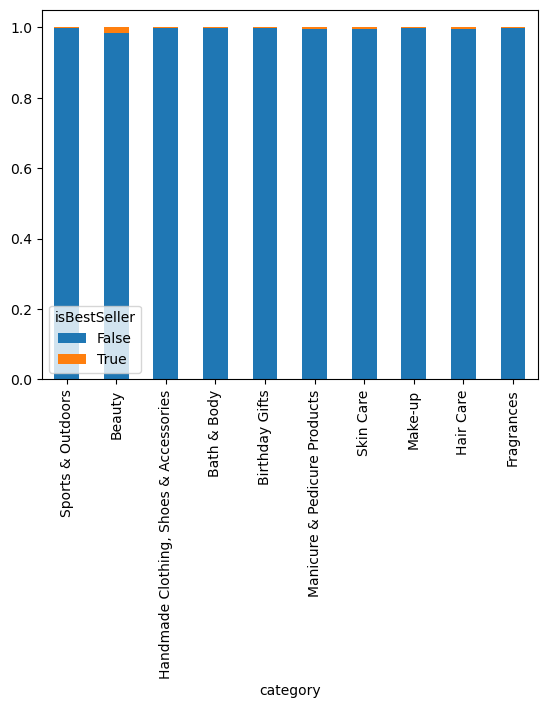

In [47]:
top_10_crosstab_normalized.plot(kind="bar", stacked=True)
plt.show()

In [51]:
# Step 1: Calculate Q1, Q3, and IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the dataframe to remove outliers
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Step 4: Investigate how product categories influence product prices
# You can now analyze the cleaned data. For example:
# 1. Summary statistics by product category
category_price_summary = df_cleaned.groupby('category')['price'].describe()


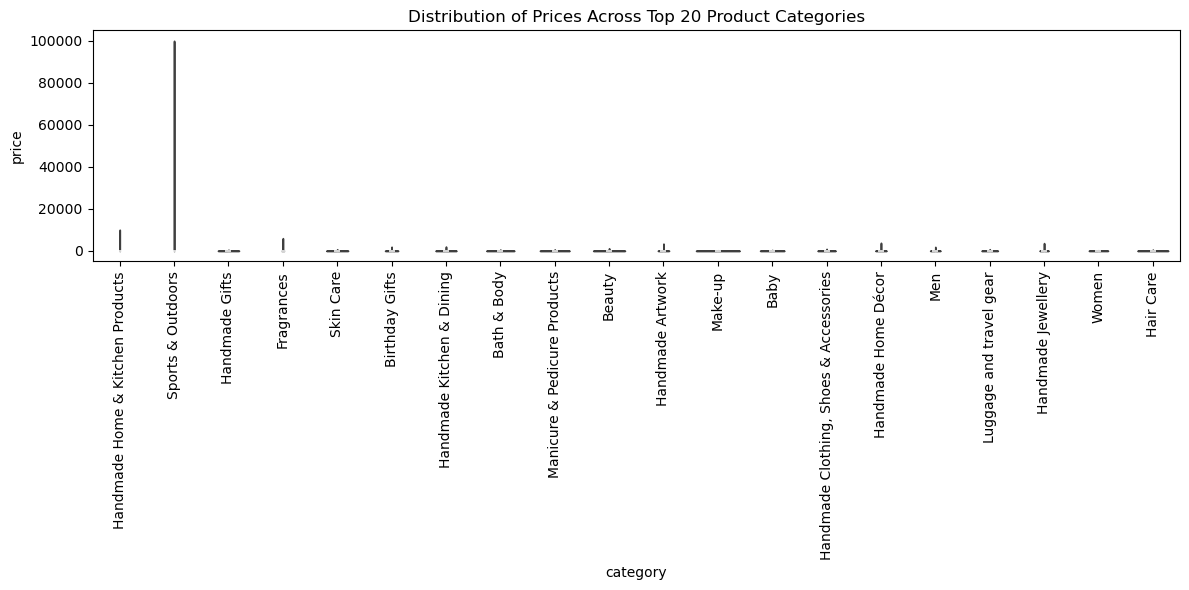

In [55]:
top_20_categories = df['category'].value_counts().head(20).index

# Step 2: Create the violin plot for top 20 categories
plt.figure(figsize=(12, 6))
sns.violinplot(x='category', y='price', data=df[df['category'].isin(top_20_categories)])
plt.title('Distribution of Prices Across Top 20 Product Categories')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [57]:
median_price_by_category = df.groupby('category')['price'].median()

# Step 4: Identify the category with the highest median price
highest_median_category = median_price_by_category.idxmax()
highest_median_price = median_price_by_category.max()

print(f"The product category with the highest median price is '{highest_median_category}' with a median price of {highest_median_price:.2f}.")

The product category with the highest median price is 'Laptops' with a median price of 1042.72.


In [61]:
avg_price_by_category = df.groupby('category')['price'].mean()


In [65]:
top_10_categories = df['category'].value_counts().head(10).index

In [67]:
avg_price_top_10 = avg_price_by_category[top_10_categories]

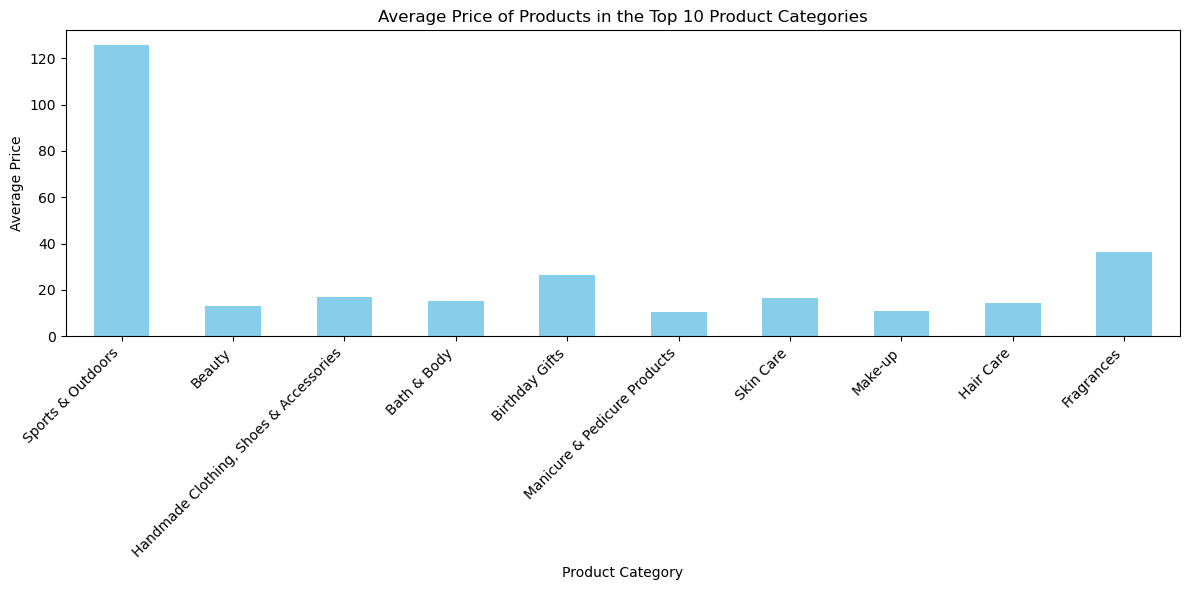

In [69]:
plt.figure(figsize=(12, 6))
avg_price_top_10.plot(kind='bar', color='skyblue')
plt.title('Average Price of Products in the Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [71]:
highest_avg_category = avg_price_by_category.idxmax()
highest_avg_price = avg_price_by_category.max()

print(f"The product category with the highest average price is '{highest_avg_category}' with an average price of {highest_avg_price:.2f}.")

The product category with the highest average price is 'Laptops' with an average price of 1087.99.


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

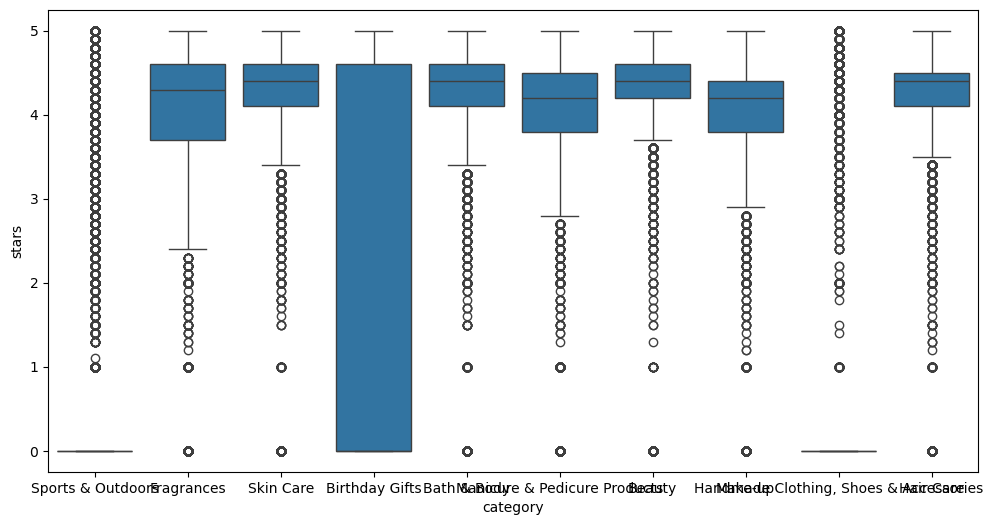

In [81]:
top_10_categories = df['category'].value_counts().head(10).index

# Step 2: Create side-by-side box plots for the top 10 categories based on product ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='stars', data=df[df['category'].isin(top_10_categories)])

plt.show()

In [87]:
median_rating_by_category = df.groupby('category')['stars'].median()


In [89]:
highest_median_rating_category = median_rating_by_category.idxmax()
highest_median_rating = median_rating_by_category.max()

print(f"The product category with the highest median rating is '{highest_median_rating_category}' with a median rating of {highest_median_rating:.2f}.")

The product category with the highest median rating is 'Computer Memory' with a median rating of 4.70.


In [99]:
from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(df['price'], df['stars'])


print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")


if p_value < 0.05:
    print("There is a statistically significant correlation between product price and its rating.")
else:
    print("There is no statistically significant correlation between product price and its rating.")


Pearson Correlation Coefficient: -0.1249
P-value: 0.0000
There is a statistically significant correlation between product price and its rating.


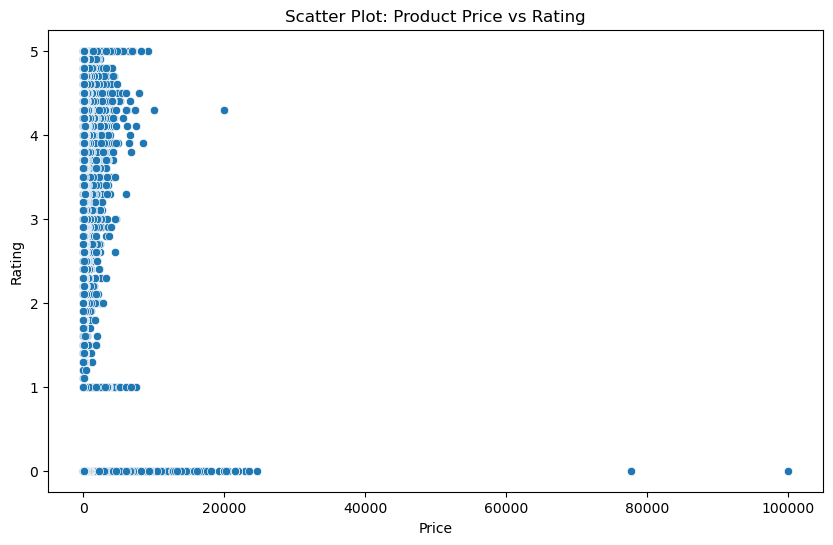

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=df)
plt.title('Scatter Plot: Product Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

In [113]:
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

,uid,asin,title,stars,reviews,price,boughtInLastMonth,category


In [115]:
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [129]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Step 1: Select all numerical columns (integers and floats)
numerical_df = df.select_dtypes(include=['number'])

# Step 2: Display the numerical columns
print(numerical_df.head())


Empty DataFrame
Columns: [uid, asin, title, stars, reviews, price, boughtInLastMonth, category]
Index: []


In [135]:
correlation_matrix=df_numerical.corr()


Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price',
       'boughtInLastMonth', 'category'],
      dtype='object')


/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Figure size 1800x1500 with 0 Axes>

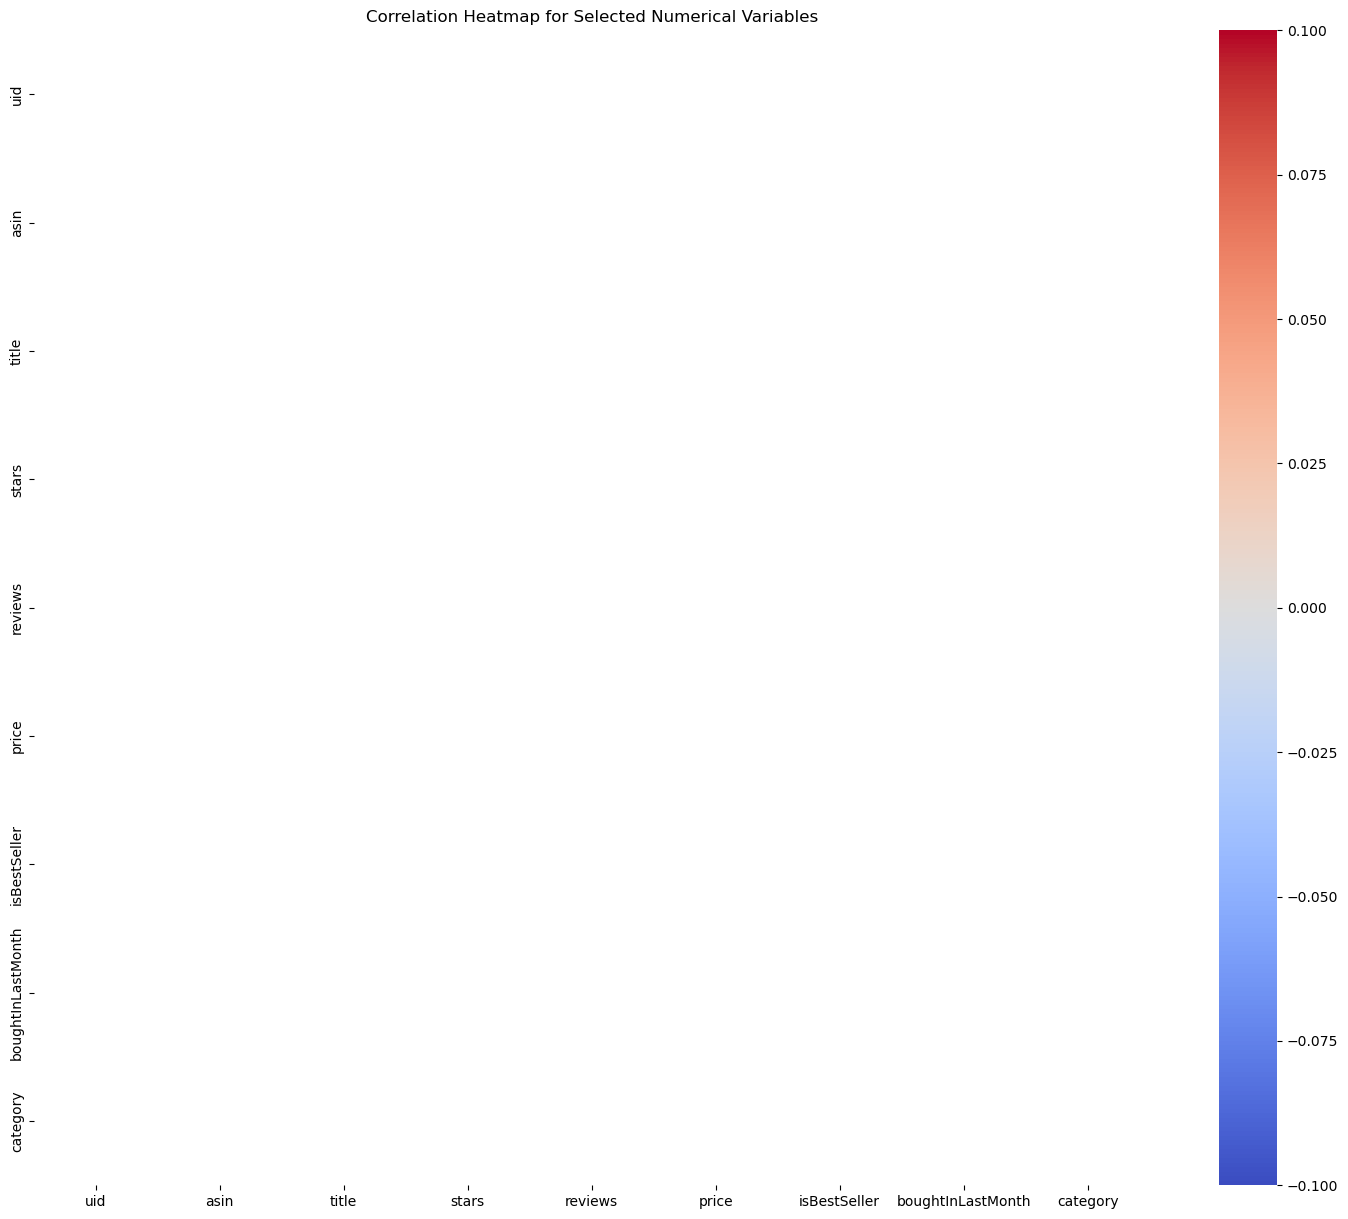

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame 'df'
# Make sure to replace 'df' with your actual DataFrame

# Step 1: Check for numerical columns
print(df.select_dtypes(include=['number']).columns)

# Step 2: Handle missing values
df_cleaned = df.dropna(subset=df.select_dtypes(include=['number']).columns)  # Drop rows with NaN values in numerical columns

# Step 3: Compute the correlation matrix
correlation_matrix = df_cleaned.corr()  # Or use df_filled.corr() if you prefer filling NaNs

# Step 4: Generate the heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()


<Figure size 1800x1500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

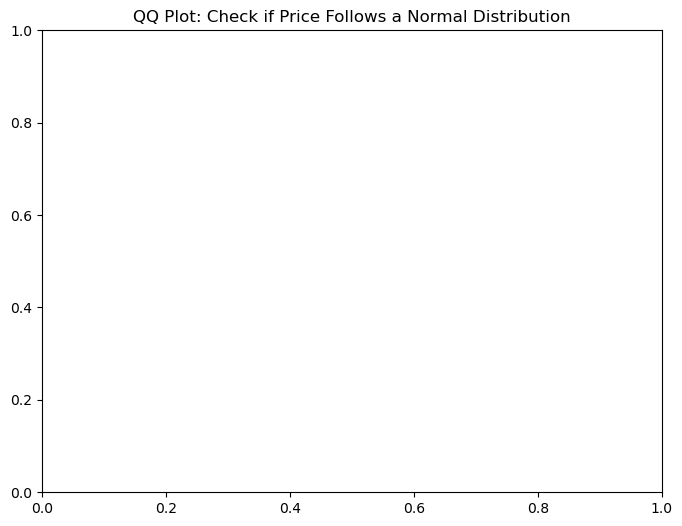

In [125]:
from scipy import stats
plt.figure(figsize=(8, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot: Check if Price Follows a Normal Distribution')
plt.show()